In [49]:
9/18/2025

0.0002469135802469136

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df = pd.read_csv('acs12.csv')

In [52]:
print(f' the shape (rows, columns):  {df.shape}')
print(f'\n first (x rows): {df.head(5)}')
print(f'\ncolumn types and non null values count: {df.info}')


 the shape (rows, columns):  (2000, 13)

 first (x rows):     income          employment  hrs_work   race  age  gender citizen  \
0  60000.0  not in labor force      40.0  white   68  female     yes   
1      0.0  not in labor force       NaN  white   88    male     yes   
2      NaN                 NaN       NaN  white   12  female     yes   
3      0.0  not in labor force       NaN  white   17    male     yes   
4      0.0  not in labor force       NaN  white   77  female     yes   

   time_to_work     lang married          edu disability    birth_qrtr  
0           NaN  english      no      college         no  jul thru sep  
1           NaN  english      no  hs or lower        yes  jan thru mar  
2           NaN  english      no  hs or lower         no  oct thru dec  
3           NaN    other      no  hs or lower         no  oct thru dec  
4           NaN    other      no  hs or lower        yes  jul thru sep  

column types and non null values count: <bound method DataFrame.info o

In [53]:
print(f'\n missing values per column: {df.isnull().sum(0)} ')


 missing values per column: income           377
employment       395
hrs_work        1041
race               0
age                0
gender             0
citizen            0
time_to_work    1217
lang             105
married            0
edu               58
disability         0
birth_qrtr         0
dtype: int64 


In [54]:
print('Summary statistics on numeric columns:')
print(f'summary: {df.describe()}')

Summary statistics on numeric columns:
summary:               income    hrs_work          age  time_to_work
count    1623.000000  959.000000  2000.000000    783.000000
mean    23599.981516   37.977059    40.224000     25.997446
std     46567.231367   13.497680    23.662857     22.290973
min         0.000000    1.000000     0.000000      1.000000
25%         0.000000   32.000000    19.750000     10.000000
50%      3000.000000   40.000000    40.000000     20.000000
75%     33700.000000   40.000000    59.000000     30.000000
max    450000.000000   99.000000    94.000000    163.000000


In [55]:
print(f'\nUnique values in gender: {df['gender'].unique}')
print(f'unique values in employment: {df['employment'].unique()}')
print(f'unique values in edu: {df['edu'].unique()}')
print(f'unique values in: birth qrtr:{df['birth_qrtr'].unique()},disable: {df['disability'].unique()},married: {df['married'].unique()},has education: {df['edu'].unique()},race: {df['race'].unique()},employedd: {df['employment'].unique()},language: {df['lang'].unique()}  ')


Unique values in gender: <bound method Series.unique of 0       female
1         male
2       female
3         male
4       female
         ...  
1995    female
1996    female
1997      male
1998      male
1999      male
Name: gender, Length: 2000, dtype: object>
unique values in employment: ['not in labor force' nan 'employed' 'unemployed']
unique values in edu: ['college' 'hs or lower' 'grad' nan]
unique values in: birth qrtr:['jul thru sep' 'jan thru mar' 'oct thru dec' 'apr thru jun'],disable: ['no' 'yes'],married: ['no' 'yes'],has education: ['college' 'hs or lower' 'grad' nan],race: ['white' 'other' 'asian' 'black'],employedd: ['not in labor force' nan 'employed' 'unemployed'],language: ['english' 'other' nan]  


In [56]:
print(df.isnull().sum())
df= df.drop_duplicates()

income           377
employment       395
hrs_work        1041
race               0
age                0
gender             0
citizen            0
time_to_work    1217
lang             105
married            0
edu               58
disability         0
birth_qrtr         0
dtype: int64


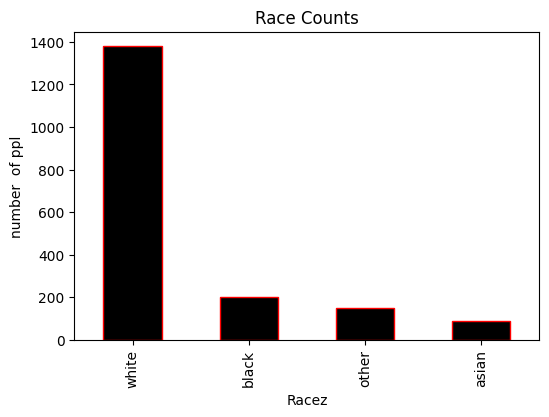

In [57]:
#plotting here    ggplot2 (r)
plt.figure(figsize=(6,4))
df['race'].value_counts().plot(kind='bar', color='black', edgecolor='red')

plt.title('Race Counts')
plt.xlabel('Racez')
plt.ylabel('number  of ppl')
plt.show()

C:\Users\oosode.Oos\AppData\Local\Temp\ipykernel_27232\1023881768.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race', y='age', data=df, palette='Set3')


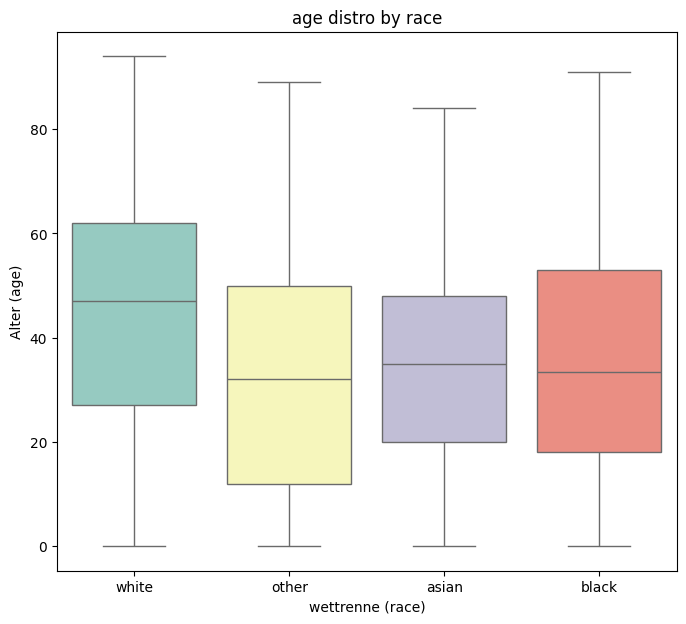

In [58]:
#wetternnen und alter( race and age)
plt.figure(figsize=(8,7))

sns.boxplot(x='race', y='age', data=df, palette='Set3')

plt.title('age distro by race')
plt.xlabel('wettrenne (race)')
plt.ylabel('Alter (age)')
plt.show()


In [59]:
#race und edu
# plt.figure(figsize=(8,6))

# sns.countplot(x='race', hue='edu', data=df, palette='Set2')

# plt.title('Education levels by race')
# plt.xlabel('race')
# plt.ylabel('Count of ppl')
# plt.legend(title='educationz')
# plt.show()

C:\Users\oosode.Oos\AppData\Local\Temp\ipykernel_27232\2137853093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race', y='income', data=df, palette='pastel')


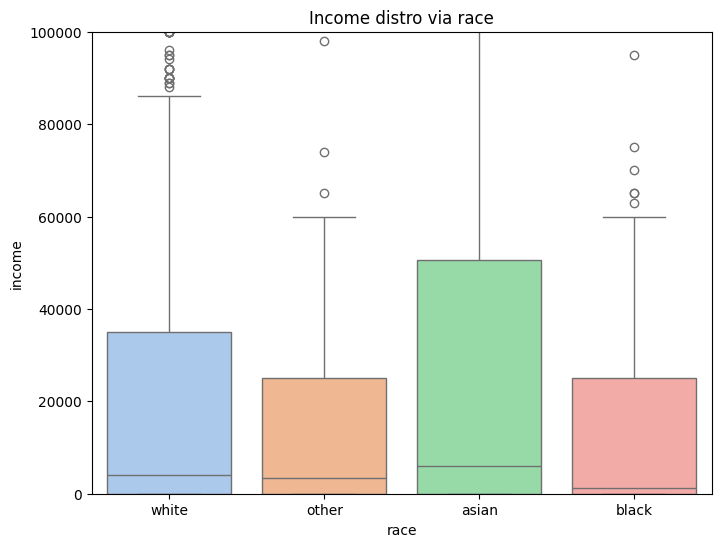

In [60]:
plt.figure(figsize=(8,6))
sns.boxplot(x='race', y='income', data=df, palette='pastel')

plt.title('Income distro via race')
plt.xlabel('race')
plt.ylabel('income')
plt.ylim(0,100000)
plt.show()

In [61]:
#summary statistics
print(df.groupby('edu')['income'].mean())
print(df.groupby('gender')['hrs_work'].mean())
print(df.groupby(['race','edu'])  ['income'].mean())

edu
college        35429.525140
grad           68776.433566
hs or lower    14587.772643
Name: income, dtype: float64
gender
female    34.573059
male      40.838772
Name: hrs_work, dtype: float64
race   edu        
asian  college         49034.090909
       grad           154181.818182
       hs or lower     15161.904762
black  college         29223.076923
       grad            38777.777778
       hs or lower     10313.730159
other  college         34291.666667
       grad            41188.888889
       hs or lower     11679.310345
white  college         35012.483221
       grad            65081.842105
       hs or lower     15515.767836
Name: income, dtype: float64
